# Neural Networks Sprint Challenge

Objectives:
  * Write a simple neural network with hidden layers
  * Perform forward propagation to make predictions on data with the network
  * Perform backward propagation of errors in the network
  * Use MLPClassifier to train and predict on a dataset

### Background

Other than the MLPClassifier objective, you will be working with this neural net during this coding challenge:

![Simple Neural Net](https://www.lucidchart.com/publicSegments/view/a5b0773e-7165-450d-99fc-7089891e099a/image.png)


### 1. Write a simple three layer network

Create variables to store weights and biases for the above network. Initialize each with $0.5$.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
params = {'w0': 0.5, 'b0': 0.5,
          'w1': 0.5, 'b1': 0.5,
          'w2': 0.5, 'b2': 0.5}

### 2. Compute forward propagation for a new sample in three layer network

Write a function `feed_forward` that takes a new sample $x$ and calculates $\hat{y}$ via forward propagation.

In [0]:
x1 = 4
x2 = 0.5
x3 = 0.125
y1 = 0
y2 = 1
y3 = 1

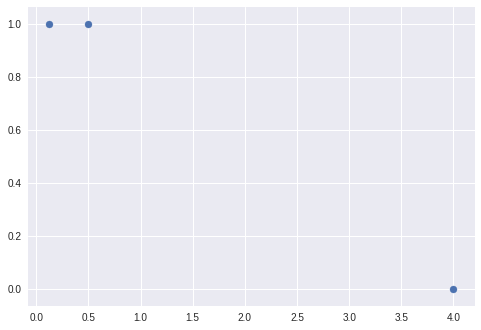

In [4]:
plt.scatter([x1, x2, x3], [y1, y2, y3]);

In [0]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def feed_forward(x):
    
    h1 = sigmoid(params['w0']*x + params['b0'])
    h2 = sigmoid(params['w1']*h1 + params['b1'])
    yhat = sigmoid(params['w2']*h2 + params['b2'])
    
    return yhat

# TEST
y_hat1 = feed_forward(x1)
y_hat2 = feed_forward(x2)
y_hat3 = feed_forward(x3)

In [6]:
print('y_hat1: {}\ny_hat2: {}\ny_hat3: {}'.format(y_hat1, y_hat2, y_hat3))

y_hat1: 0.7030299333006731
y_hat2: 0.7003970647199883
y_hat3: 0.6999291610175293


### 3. Compute backward propagation for the same network

The backprop algorithm is derived from the goal of minimizing the error (or loss) function $\epsilon = (y - \hat{y})^2$.

$\epsilon = (y - \sigma(h_2+b_2))^2$

Via the chain rule, the derivative of the above is

$\frac{\partial \epsilon}{\partial \hat{y}} = 2(\hat{y}-y)$

Let $\alpha = 0.1$. Update the weights for $h_2$ and $h_1$ via back propagation so that $w_{h2}$ = $w_{h2} + \alpha \frac{\partial \epsilon}{\partial w_{h2}}$ and $w_{h1} = w_{h1} + \alpha \frac{\partial \epsilon}{\partial w_{h1}}$

Also, let $\sigma(x) = ReLU(x)$. As such, $\sigma'(x) = 0$ when $x \le 0$ and $\sigma'(x) = 1$ when $x \gt 0$.

Check Case1: of [Brian Dolhansky](http://briandolhansky.com/blog/2013/9/27/artificial-neural-networks-backpropagation-part-4) for a more detailed explanation of the values in the back propagation.


Since the output layer is still performing binary classification, I will use a sigmoid activation there. Also, in favor of interpretibility, I will explicitly make variables for each partial derivative I will be chaining together, even if some of them are equal to 1, or to existing parameters.

![](http://www.rayheberer.ai/img/lambdaschool/3layer.jpg)

In [0]:
def relu(x):
    return np.maximum(0, x)

def feed_forward_and_back_propagate(x, y, alpha=0.1):
    global params
    
    # forward pass
    z1 = params['w0']*x + params['b0']
    h1 = relu(z1)
    
    z2 = params['w1']*h1 + params['b1']
    h2 = relu(z2)
    
    z3 = params['w2']*h2 + params['b2']
    yhat = sigmoid(z3)
    
    # backpropagation, output layer
    dE_dyhat = yhat - y
    dyhat_dz3 = sigmoid(z3) * (1-sigmoid(z3))
    dE_dz3 = dE_dyhat * dyhat_dz3
    
    dz3_dw2 = h2
    dz3_db2 = 1
    
    # h2 layer
    dz3_dh2 = params['w2']
    dh2_dz2 = 1 if z2 > 0 else 0
    dE_dz2 = dE_dz3 * dz3_dh2 * dh2_dz2
    
    dz2_dw1 = h1
    dz2_db1 = 1
    
    # h1 layer
    dz2_dh1 = params['w1']
    dh1_dz1 = 1 if z1 > 0 else 0
    dE_dz1 = dE_dz2 * dz2_dh1 * dh1_dz1
    
    dz1_dw0 = x
    dz1_db0 = 1
    
    # derivatives with respect to weights and biases via chain rule
    deltas = {'w0': dE_dz1 * dz1_dw0, 
              'b0': dE_dz1 * dz1_db0,
              'w1': dE_dz2 * dz2_dw1,
              'b1': dE_dz2 * dz2_db1,
              'w2': dE_dz3 * dz3_dw2,
              'b2': dE_dz3 * dz3_db2}
    
    for param in params.keys():
        params[param] = params[param] - alpha*deltas[param]
        
    return yhat

In [0]:
# CODE
y_hat4 = feed_forward_and_back_propagate(x1,y1)
y_hat5 = feed_forward_and_back_propagate(x2,y2)
y_hat6 = feed_forward_and_back_propagate(x3,y3)

In [9]:
print('y_hat4: {}\ny_hat5: {}\ny_hat6: {}'.format(y_hat4, y_hat5, y_hat6))

y_hat4: 0.7981867777396212
y_hat5: 0.7096944415850966
y_hat6: 0.7034645495997112


In [0]:
# copying the initialization code block so I can run multiple trials

params = {'w0': 0.5, 'b0': 0.5,
          'w1': 0.5, 'b1': 0.5,
          'w2': 0.5, 'b2': 0.5}

In [11]:
epochs = 1000
X = [x1, x2, x3]
Y = [y1, y2, y3]

for epoch in range(epochs):
    for x, y in zip(X, Y):
        feed_forward_and_back_propagate(x, y)
        
    if (epoch+1) % 100 == 0 or epoch==0:
        sse = 0
        accuracy = 0
        
        for x, y in zip(X, Y):
            yhat = feed_forward_and_back_propagate(x, y)
            sse += (y-yhat)**2
            accuracy += (np.round(yhat)==y)
            
        accuracy /= len(X)
        print('epoch {}\nSSE: {}\nAccuracy: {:.1f}%\n'.format(epoch+1, 
                                                             sse, 
                                                             accuracy*100))

y_hat4 = feed_forward_and_back_propagate(x1,y1)
y_hat5 = feed_forward_and_back_propagate(x2,y2)
y_hat6 = feed_forward_and_back_propagate(x3,y3)

epoch 1
SSE: 0.8002687651665472
Accuracy: 66.7%

epoch 100
SSE: 0.6745517349612775
Accuracy: 66.7%

epoch 200
SSE: 0.6714364081819317
Accuracy: 66.7%

epoch 300
SSE: 0.6707608546397539
Accuracy: 66.7%

epoch 400
SSE: 0.6698981687465115
Accuracy: 66.7%

epoch 500
SSE: 0.6621386020524618
Accuracy: 66.7%

epoch 600
SSE: 0.5654037644051342
Accuracy: 66.7%

epoch 700
SSE: 0.2996171799453438
Accuracy: 100.0%

epoch 800
SSE: 0.12848935343971607
Accuracy: 100.0%

epoch 900
SSE: 0.067331239685979
Accuracy: 100.0%

epoch 1000
SSE: 0.04212986857517585
Accuracy: 100.0%



### 4. Use MLPClassifier to train a dataset

`X` is now a small dataset. Create an MLPClassifier from sklearn and train it on the `X` dataset, with `y` as the targets.

In [12]:
from sklearn.neural_network import MLPClassifier

X = np.row_stack([x1,x2,x3])
y = np.row_stack([y1,y2,y3])

model = MLPClassifier(
                    hidden_layer_sizes=(15, 2),
                    activation='logistic',
                    solver='sgd',
                    alpha=1e-5,
                    batch_size=3, 
                    learning_rate='adaptive',
                    learning_rate_init=1,
                    max_iter=200,
                    shuffle=True,
                    random_state=42,
                    verbose=10,
                    tol=1e-4 )

model.fit(X, y)

Iteration 1, loss = 0.74575552
Iteration 2, loss = 0.64876748
Iteration 3, loss = 0.64309995
Iteration 4, loss = 0.64810527
Iteration 5, loss = 0.63680024
Iteration 6, loss = 0.61984340
Iteration 7, loss = 0.60648552
Iteration 8, loss = 0.59519955
Iteration 9, loss = 0.58077987
Iteration 10, loss = 0.55956157
Iteration 11, loss = 0.52995884
Iteration 12, loss = 0.49142231
Iteration 13, loss = 0.44314405
Iteration 14, loss = 0.38546625
Iteration 15, loss = 0.32253528
Iteration 16, loss = 0.26039490
Iteration 17, loss = 0.20430949
Iteration 18, loss = 0.15736909
Iteration 19, loss = 0.12024467
Iteration 20, loss = 0.09196359
Iteration 21, loss = 0.07085570
Iteration 22, loss = 0.05520649
Iteration 23, loss = 0.04357135
Iteration 24, loss = 0.03485039
Iteration 25, loss = 0.02824640
Iteration 26, loss = 0.02319177
Iteration 27, loss = 0.01928255
Iteration 28, loss = 0.01622904
Iteration 29, loss = 0.01382125
Iteration 30, loss = 0.01190530
Iteration 31, loss = 0.01036731
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='logistic', alpha=1e-05, batch_size=3, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15, 2), learning_rate='adaptive',
       learning_rate_init=1, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=10,
       warm_start=False)

In [13]:
yhat = model.predict(X)
accuracy = np.mean(yhat == y.flatten())

print('MLP Accuracy: {:.0f}%'.format(accuracy*100))

MLP Accuracy: 100%
